Import NumPy, Pandas and PyPlot

In [104]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

Read the CSV file with separator as comma

In [105]:
all_diets_df = pd.read_csv("All_Diets.csv", sep=",")
all_diets_df.head()

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Extraction_day,Extraction_time
0,paleo,Bone Broth From 'Nom Nom Paleo',american,5.22,1.29,3.20,2022-10-16,17:20:09
1,paleo,"Paleo Effect Asian-Glazed Pork Sides, A Sweet ...",south east asian,181.55,28.62,146.14,2022-10-16,17:20:09
2,paleo,Paleo Pumpkin Pie,american,30.91,302.59,96.76,2022-10-16,17:20:09
3,paleo,Strawberry Guacamole recipes,mexican,9.62,75.78,59.89,2022-10-16,17:20:09
4,paleo,"Asian Cauliflower Fried ""Rice"" From 'Nom Nom P...",chinese,39.84,54.08,71.55,2022-10-16,17:20:09


Check unique values of the categorical attributes - diet types, cuisine types

In [106]:
diet_types = all_diets_df['Diet_type']
diet_types.unique()

array(['paleo', 'vegan', 'keto', 'mediterranean', 'dash'], dtype=object)

In [107]:
cuisine_types = all_diets_df['Cuisine_type']
cuisine_types.unique()

array(['american', 'south east asian', 'mexican', 'chinese',
       'mediterranean', 'italian', 'french', 'indian', 'nordic',
       'eastern europe', 'central europe', 'kosher', 'british',
       'caribbean', 'south american', 'middle eastern', 'asian',
       'japanese', 'world'], dtype=object)

Check count against the diet types

In [127]:
all_diets_df.groupby(['Diet_type'])['Diet_type'].count().reset_index(name='counts')

,Diet_type,counts
0,dash,1745
1,keto,1512
2,mediterranean,1753
3,paleo,1274
4,vegan,1522


We can see that there is sufficient data for all the diet types

Check count of unique recipe names

In [108]:
cuisine_types = all_diets_df['Recipe_name']
len(cuisine_types.unique())

7062

Check for missing data in the columns

In [109]:
all_diets_df.isna().sum()

Diet_type          0
Recipe_name        0
Cuisine_type       0
Protein(g)         0
Carbs(g)           0
Fat(g)             0
Extraction_day     0
Extraction_time    0
dtype: int64

So, there is no missing data

Check if there are multiple rows for any recipe

In [110]:
table1 = all_diets_df.groupby(['Recipe_name'])['Recipe_name'].count().reset_index(name='counts')
table1.loc[table1['counts'] > 1]

,Recipe_name,counts
124,Almond Meal Encrusted Chicken Nuggets - REAL F...,2
129,Aloo Gobi,2
157,Apple Fennel Casserole with a Coconut-Turmeric...,2
226,Aunt Rocky’s Chorizo and Spaghetti Squash Cass...,2
227,Aunt Rocky’s Colored Sprinkles (Sugar Free),2
...,...,...
6748,Vegan Spice Cake,2
6752,Vegan Spinach Pinwheels recipes,2
6785,Vegan Tiramisu,2
6792,Vegan Vanilla Ice Cream,2


Out of 7062 total recipes, there are 446 recipes with more than one record. Let's check the histogram of the count where count is more than 1.

<AxesSubplot: >

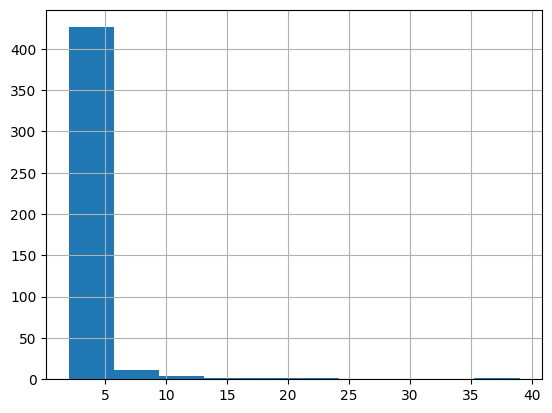

In [111]:
table1.loc[table1['counts'] > 1]['counts'].hist()

For recipes with more than one entry, keep one entry with mean value of the weights.
For this, let's use groupby function with mean() calculation. Keeping only numeric values will get rid of the extraction day and time.
Reset_index() is used to get a resultant dataframe.

In [112]:
all_diets_df1 = all_diets_df.groupby(['Diet_type','Recipe_name','Cuisine_type']).mean(numeric_only=True).reset_index()
all_diets_df1

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g)
0,dash,"""Fruit Cocktail"" Crisp",american,10.34,166.68,26.00
1,dash,'Bella Asada Fajitas,mexican,12.39,85.11,14.77
2,dash,'Dragon prawn' noodles,asian,165.01,267.89,49.48
3,dash,10-Minute Egg Drop Soup,chinese,43.17,69.38,42.96
4,dash,100-Mile Dash,american,1.90,236.76,1.02
...,...,...,...,...,...,...
7178,vegan,curried lentils with sweet potatoes.,indian,89.51,311.47,14.88
7179,vegan,the best vegan cheesecake,american,63.31,346.83,174.07
7180,vegan,{Vegan} Homemade Peanut Butter Cups,american,34.86,156.24,112.15
7181,vegan,{Vegan} Peanut Butter & Honey Muffins recipes,american,29.53,168.46,59.83


There are now 7183 unique recipes in the data.

Check histogram of the total food weight (i.e. sum of Protein, Carb and Fat) - to check for skew in the weights.

Text(0.03, 0.5, 'Recipe count')

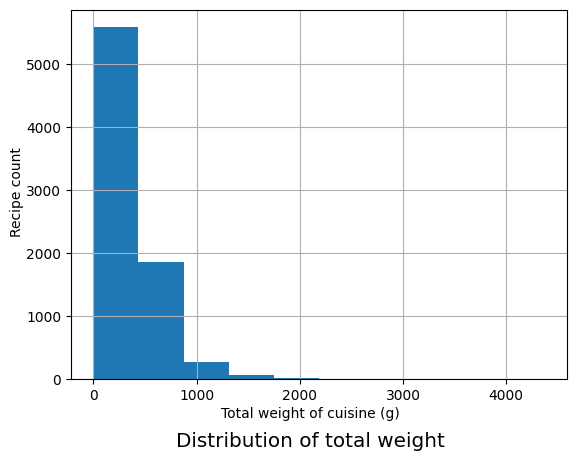

In [113]:
# Create PyPlot axes
fig, axes = plt.subplots(nrows=1, ncols=1, sharex=True, sharey=True)
# Plot the histogram of total weight using the axes
(all_diets_df['Protein(g)']+all_diets_df['Carbs(g)']+all_diets_df['Fat(g)']).hist(ax=axes)
# Provide a name for the chart using appropriate coordinates and font
plt.suptitle(f'Distribution of total weight', x=0.5, y=0.0, ha='center', fontsize='x-large')
# Provide axis labels
fig.text(0.5, 0.03, 'Total weight of cuisine (g)', ha='center')
fig.text(0.03, 0.5, 'Recipe count', va='center', rotation='vertical')

The data seems to be skewed and majority of the cuisines have weight under 1000 gms

Need to check if this skewing is for any particular the diet type

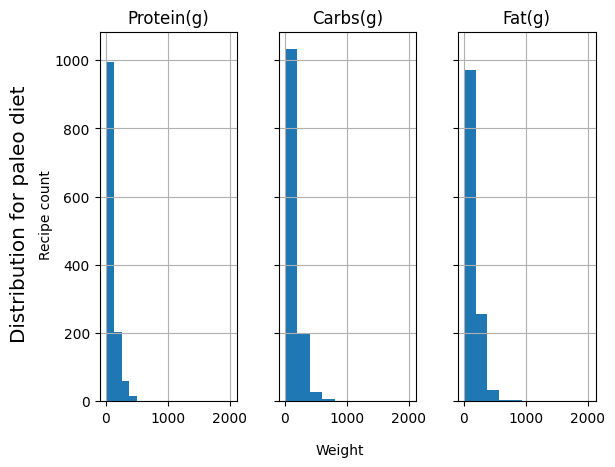

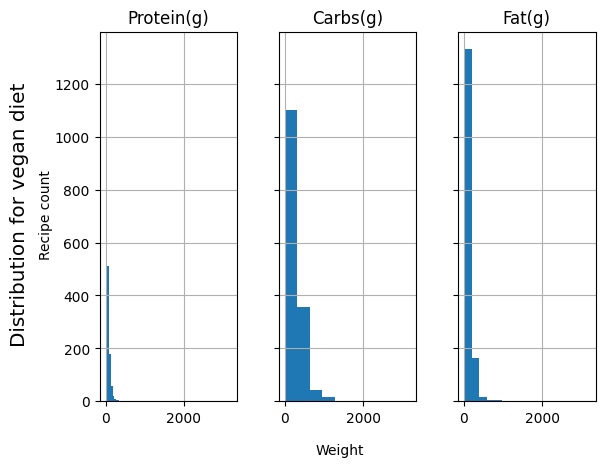

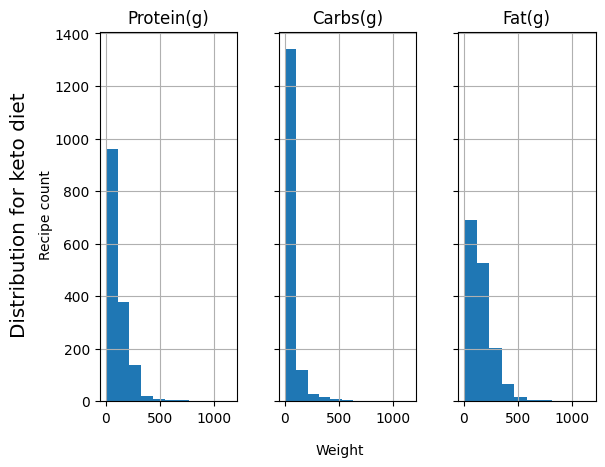

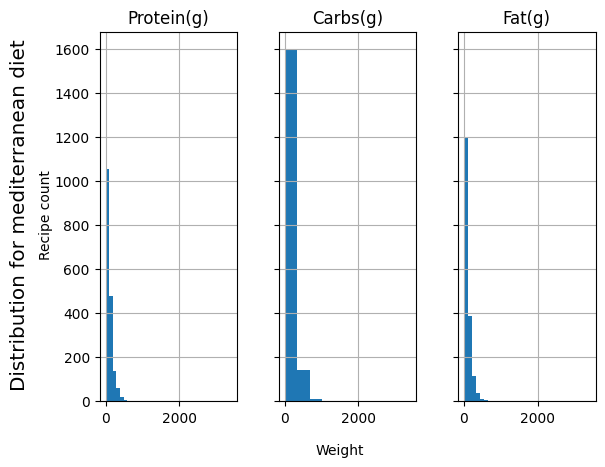

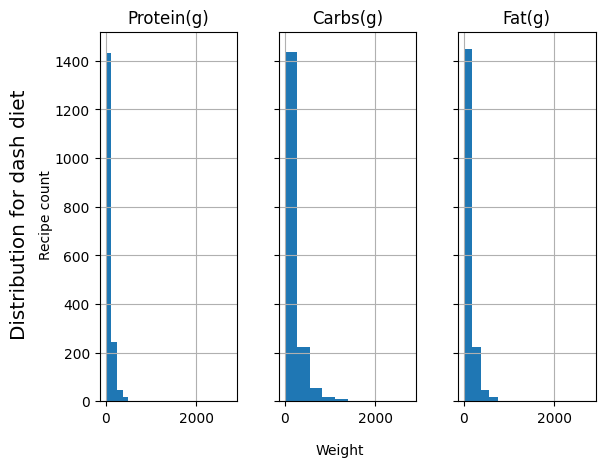

In [114]:
# Loop through the diet types
for diet_type in diet_types.unique():
    # set up figure & axes
    fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)
    # use the axes for histogram
    all_diets_df.loc[all_diets_df['Diet_type'] == diet_type][['Protein(g)','Carbs(g)','Fat(g)']].hist(ax=axes)
    # set title and axis labels
    plt.suptitle(f'Distribution for {diet_type} diet', x=0.0, y=0.5, va='center', rotation='vertical', fontsize='x-large')
    fig.text(0.5, 0.00, 'Weight', ha='center')
    fig.text(0.03, 0.5, 'Recipe count', va='center', rotation='vertical')

So, we can see there no major imbalance in the data i.e. no particular diet type lies entirely in the skewed region.

Another way of checking would be to see the number of diet types above and below a count threshold e.g. 1000.

For this, let's add two new columns - total weight and a new column indicating whether the weight is over 1 kg

In [115]:
all_diets_df1['Total weight'] = all_diets_df1['Protein(g)']+all_diets_df1['Carbs(g)']+all_diets_df1['Fat(g)']

In [116]:
all_diets_df1['weight over 1kg'] = all_diets_df1['Total weight'] > 1000

Create a pivot table with Diet type as rows and the new indicator as column

In [117]:
table = pd.pivot_table(all_diets_df1, index='Diet_type', columns='weight over 1kg', 
                       values=['Total weight'], aggfunc='count')
table

Total weight      
weight over 1kg        False True 
Diet_type                         
dash                    1618    80
keto                    1446    23
mediterranean           1323    33
paleo                   1165    23
vegan                   1410    62

Let's plot in a stacked bar for visual representation

<AxesSubplot: title={'center': 'Weight of recipe below and above 1 kg'}, xlabel='Diet type', ylabel='Weight (g)'>

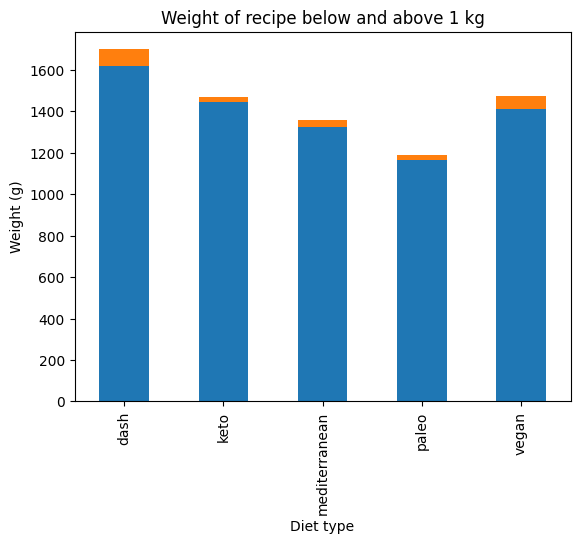

In [118]:
# Create a stacked bar chart, provide title and axis labels. legend is not needed.
table.plot.bar(stacked=True, ylabel='Weight (g)', xlabel='Diet type', legend = False, title='Weight of recipe below and above 1 kg')

Drop the recipes with weight over 1 kg

In [119]:
# Creating a new dataframe instead of changing inplace.
# all_diets_df1.drop(all_diets_df1[all_diets_df1['weight over 1kg'] == True].index, inplace = True)
all_diets_df2 = all_diets_df1.drop(all_diets_df1[all_diets_df1['weight over 1kg'] == True].index)
all_diets_df2

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g),Total weight,weight over 1kg
0,dash,"""Fruit Cocktail"" Crisp",american,10.34,166.68,26.00,203.02,False
1,dash,'Bella Asada Fajitas,mexican,12.39,85.11,14.77,112.27,False
2,dash,'Dragon prawn' noodles,asian,165.01,267.89,49.48,482.38,False
3,dash,10-Minute Egg Drop Soup,chinese,43.17,69.38,42.96,155.51,False
4,dash,100-Mile Dash,american,1.90,236.76,1.02,239.68,False
...,...,...,...,...,...,...,...,...
7178,vegan,curried lentils with sweet potatoes.,indian,89.51,311.47,14.88,415.86,False
7179,vegan,the best vegan cheesecake,american,63.31,346.83,174.07,584.21,False
7180,vegan,{Vegan} Homemade Peanut Butter Cups,american,34.86,156.24,112.15,303.25,False
7181,vegan,{Vegan} Peanut Butter & Honey Muffins recipes,american,29.53,168.46,59.83,257.82,False


Remove the interim columns 'Total weight' and 'weight over 1kg'

In [120]:
all_diets_df2.drop(['Total weight', 'weight over 1kg'], axis=1, inplace = True)
all_diets_df2

,Diet_type,Recipe_name,Cuisine_type,Protein(g),Carbs(g),Fat(g)
0,dash,"""Fruit Cocktail"" Crisp",american,10.34,166.68,26.00
1,dash,'Bella Asada Fajitas,mexican,12.39,85.11,14.77
2,dash,'Dragon prawn' noodles,asian,165.01,267.89,49.48
3,dash,10-Minute Egg Drop Soup,chinese,43.17,69.38,42.96
4,dash,100-Mile Dash,american,1.90,236.76,1.02
...,...,...,...,...,...,...
7178,vegan,curried lentils with sweet potatoes.,indian,89.51,311.47,14.88
7179,vegan,the best vegan cheesecake,american,63.31,346.83,174.07
7180,vegan,{Vegan} Homemade Peanut Butter Cups,american,34.86,156.24,112.15
7181,vegan,{Vegan} Peanut Butter & Honey Muffins recipes,american,29.53,168.46,59.83


Create columns with the percentages of protein, carbs and fat.

In [121]:
all_diets_df2['Protein %'] = all_diets_df2['Protein(g)']/(all_diets_df2['Protein(g)']+all_diets_df2['Carbs(g)']+all_diets_df2['Fat(g)'])
all_diets_df2['Carbs %'] = all_diets_df2['Carbs(g)']/(all_diets_df2['Protein(g)']+all_diets_df2['Carbs(g)']+all_diets_df2['Fat(g)'])
all_diets_df2['Fat %'] = all_diets_df2['Fat(g)']/(all_diets_df2['Protein(g)']+all_diets_df2['Carbs(g)']+all_diets_df2['Fat(g)'])

Drop the columns with exact weight

In [122]:
all_diets_df2.drop(['Protein(g)', 'Carbs(g)', 'Fat(g)'], axis=1, inplace = True)
all_diets_df2

,Diet_type,Recipe_name,Cuisine_type,Protein %,Carbs %,Fat %
0,dash,"""Fruit Cocktail"" Crisp",american,0.050931,0.821003,0.128066
1,dash,'Bella Asada Fajitas,mexican,0.110359,0.758083,0.131558
2,dash,'Dragon prawn' noodles,asian,0.342075,0.555351,0.102575
3,dash,10-Minute Egg Drop Soup,chinese,0.277603,0.446145,0.276252
4,dash,100-Mile Dash,american,0.007927,0.987817,0.004256
...,...,...,...,...,...,...
7178,vegan,curried lentils with sweet potatoes.,indian,0.215241,0.748978,0.035781
7179,vegan,the best vegan cheesecake,american,0.108369,0.593674,0.297958
7180,vegan,{Vegan} Homemade Peanut Butter Cups,american,0.114955,0.515218,0.369827
7181,vegan,{Vegan} Peanut Butter & Honey Muffins recipes,american,0.114537,0.653402,0.232061


Check one diet type and percentage of the components - to have an idea whether there is any strong corelation between the percentage of the components and the diet type

array([[<AxesSubplot: title={'center': 'Protein %'}>,
        <AxesSubplot: title={'center': 'Carbs %'}>],
       [<AxesSubplot: title={'center': 'Fat %'}>, <AxesSubplot: >]],
      dtype=object)

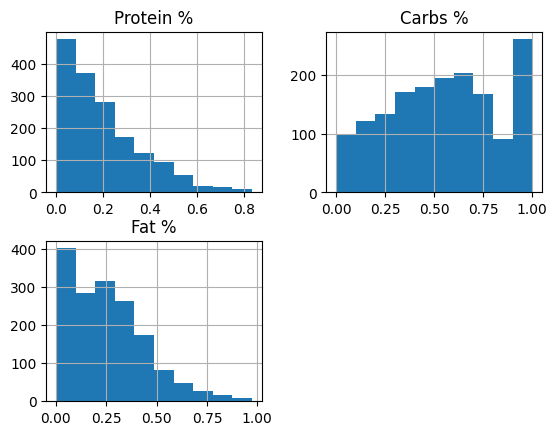

In [124]:
all_diets_df2.loc[all_diets_df2['Diet_type'] == 'dash'][['Protein %','Carbs %','Fat %']].hist()

Check the percentage values against all diet types

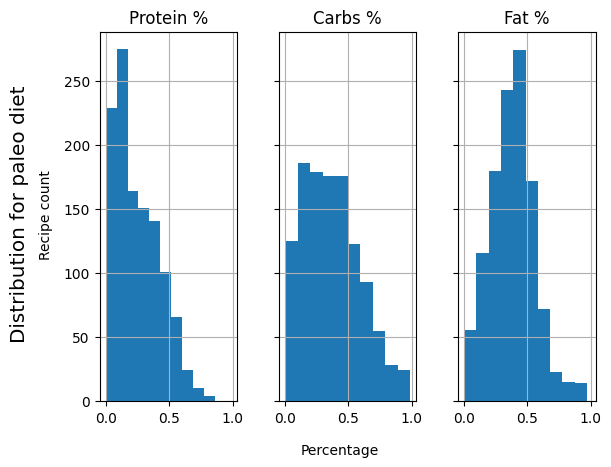

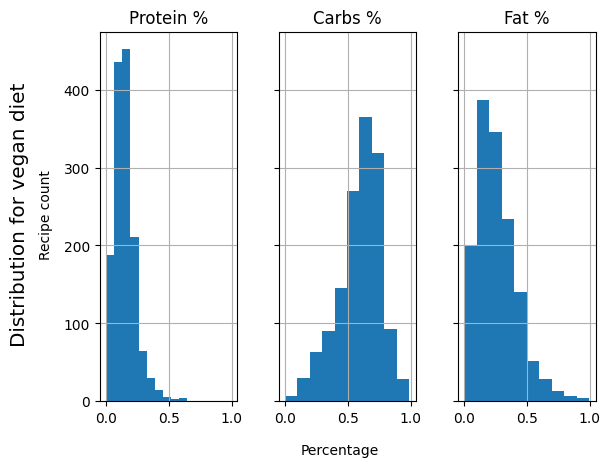

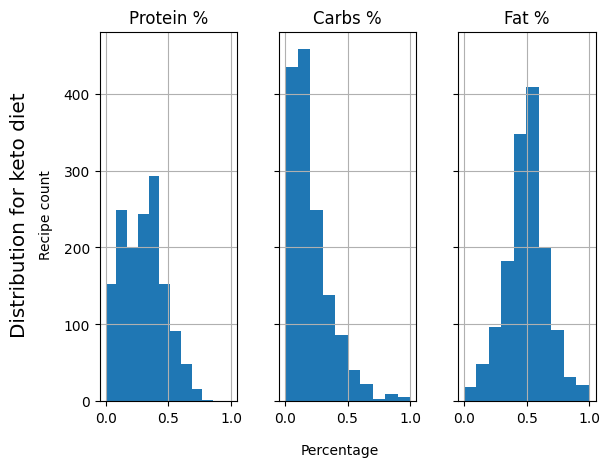

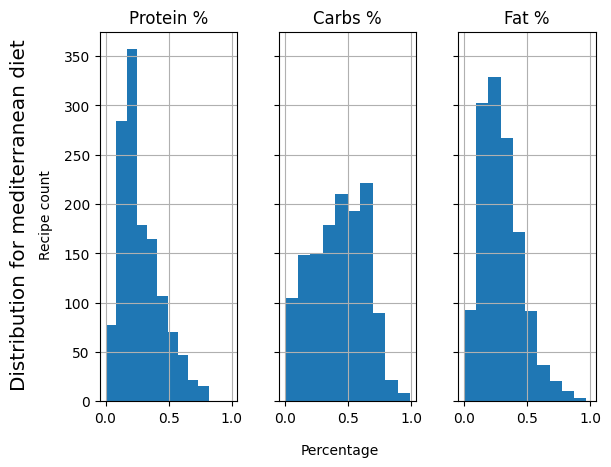

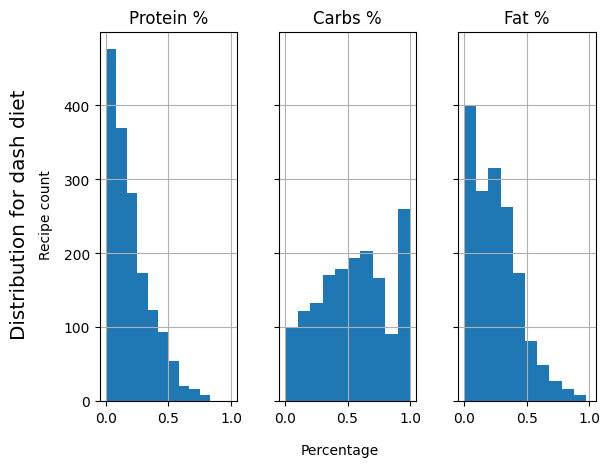

In [126]:
# Loop through the diet types
for diet_type in diet_types.unique():
    # set up figure & axes
    fig, axes = plt.subplots(nrows=1, ncols=3, sharex=True, sharey=True)
    # use the axes for histogram
    all_diets_df2.loc[all_diets_df2['Diet_type'] == diet_type][['Protein %','Carbs %','Fat %']].hist(ax=axes)
    # set title and axis labels
    plt.suptitle(f'Distribution for {diet_type} diet', x=0.0, y=0.5, va='center', rotation='vertical', fontsize='x-large')
    fig.text(0.5, 0.00, 'Percentage', ha='center')
    fig.text(0.03, 0.5, 'Recipe count', va='center', rotation='vertical')



That should be all the analysis for now! Next step would be Modelling.